https://www.tensorflow.org/tutorials/load_data/images

텐서로 이미지를 무식하게 불러오는 방법은 텐서로 관리할 수 있고, 속도가 빠르다. 보통은 데이터 불러오는 건 딱 한번 만들지만, 만들기가 어렵다. 현재 우리는 가지고 있는 데이터만 처리한다고 생각하는데, 나중에 들어오는 데이터도 생각해야 한다. image data generator는 축복이다. 이 비슷한게 파이토치에도 있고, 다른데도 있는데 정말 좋다. 그래서 케라스하고 파이토치하고 서로 배껴가기도 한다. 

이미지 데이터를 불러오고 -> 모델을 구성한다 (케라스, 텐서플로 2가지 방법)

 - 텐서플로 이용: 생으로 하는게 너무 귀찮으니, 에스티메이터라는 것을 지원했다. 그런데 이건 케라스로 대신할 수 있다. 홈페이지에서 에스티메이터 보다는 케라스로 하는 것을 추천한다. 에스티메이터는 말은 쉽지 아주 복잡한 구조다. 더이상 안쓰니.. 에스티메이터는 버려라.
 - 케라스 이용: 쉽고 편~~~~~~~하다 ^^
 
텐서플로 2.0은 비정형데이터에 최적화 되어있다. 근데 1.0대에서는 정형데이터에 쓰는 예시들이 별로 없다. 판다스하고 텐서플로를 연동할 수 있는데, 이렇게 하면 파이프라인을 구성해서 전처리같은것을 한번에 할 수 있다. 그런데 이걸 시용하면 판다스하고 바로 붙어버려서, 아주 효울적으로 쓸 수 있다.

# 사이킷 DNN

옵션을 엄청 많이 넣을 수 있다. 그래서 에스티메이터 쓰느니, 이걸 많이 썼다고 한다. 그래서 에스티메이터가 뭐냐? 자주 만드는 애들을 추상화 시켜서, 하이레벨 기법으로 만드는 애를 에스티메이터라고 한다. fit 대신 train을 넣고, 데이터를 바로 넣는 대신 데이터 인풋 함수를 넣는다. 

In [1]:
from sklearn.neural_network import MLPClassifier

MLPClassifier() # shitf tab

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

케라스로 딥러닝 모델 짜는 방법

 - sequencial
 - Model 이용
 - Model을 이용한 상속
 
그런데 sequencial을 이용한 것은 멀티 인풋, 멀티 아웃풋이 안된다. 그래서 RNN같은 경우는 sequencial로 만들 수 없는 것이다.

eager tensor라는 것을 써서, 바로바로 결과값을 확인할 수 있다.

뉴럴네트워크는 Gradient descent를 써서 학습한다. 러닝 레이트를 어떻게 하는가, 그레디언트를 어떻게 하는가에 따라서 학습이 달라진다. 학습을 시키는데 fit에 에폭도 넣고, 밸리데이션도 넣을 수 있다. callback도 있고 등 많은 옵션이 있는데, 알렉스넷의 경우 젤 처음에 몇번 에폭 돌다가 러닝레이트를 바꿀 수 있다. 그런데 이건 우린 못한다. 단계마다 하이퍼파라미터를 조절 못하는 것이다. 이걸 할 수 있는게 train_on_batch이다.

이 학습시키는 방법도 오버피팅에 관련된 것이기 때문에 잘 배워야 하는데, 에폭을 많이 돌릴 수록 오버피팅이 발생시키기 때문이다. 그래서 단계별로 학습시키는 기법이 필요하다. 

### 백프로파게이션의 미분

컴퓨터는 미분을 할 때, 리미트 0으로 수렴하는 것을 아주 작은 값으로 표현한다. 이것을 computational differenciation이라고 한다. 텐서플로에도 당연히 있다. 

autograd라고도 한다. 이 개념만 잘 알고 있으면, 파이토치에도 적용할 수 있다. 

# 그래디언트 테이프

https://www.tensorflow.org/tutorials/customization/autodiff

자동미분이라는 것은 벡터값 중에 0이 되는 값을 찾는 것이다. 로스 펑션이 만들어졌다는 가정 하에, n 차원 벡터에서 미분을 계산한다. 자동미분을 해두면 지가 알아서 다 계산해준다. 쓰기는 쉬운데 복잡하다.

다시 말하지만, loss function이 있다는 가정 하에 최적화하는 것이다. 텐서프로 2.0에서는 백프로파게이션 하면서 각 노드마다 미분값을 저장해둔다. 그 구하는 각각을 저장해둔 공간을 그레디언트 테이프라고 생각하면 된다. ★★★ 카세트 테이프라는 것이 있는데, 여기에도 데이터를 저장해둘 수 있었지? 그거 생각하면 된다. 그래디언트를 기록해두는 저장매체라고 이해하면 된다.

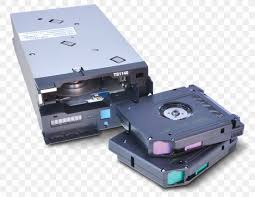

컴퓨터만의 미분 방식

 - 후진 방식: 이 중 하나가 back propagation이다. 
 - 전진 방식
 
ndarray로 미분값 계산하는게 바로 후진방식 자동미분이다. 백프로파게이션처럼 뒤에서 계산해준다.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [21]:
x = tf.ones((2, 2))

# with는 context mamager라고도 한다.
# loss function을 넣어줘야 한다. with 안에
# with 벗어나도 값 안없어진다.
with tf.GradientTape() as t:
    t.watch(x) # x를 변수처럼 여긴다. 이걸 안하면 결과값이 None이 된다.
    y = tf.reduce_sum(x) # loss function
    z = tf.multiply(y, y)# 최종 loss function

In [8]:
import inspect

print(inspect.getsource(plt.xkcd().__exit__))

    def __exit__(self, exc_type, exc_value, exc_tb):
        self.__fallback()



fallback은 앞부분 실행되기 이전 상태로 돌아가라는 뜻이다. 항상 close가 아니다. 항상 with 구문이 나오면, close인지 아닌지 inspect로 알아봐야 한다.

gradient tape에 로스 펑션을 집어넣는게 핵심이다. ★★★

In [23]:
# 입력 텐서 x에 대한 z의 도함수
dz_dx = t.gradient(z, x) # z함수를 x에 관해서 미분해라라는 뜻
# 각각이 다 0이 안나왔는지 확인하는 구문. 결국엔 8.0인지를 체크한다.
for i in [0, 1]:
    for j in [0, 1]:
        assert dz_dx[i][j].numpy() == 8.0

또한 tf.GradientTape 컨텍스트 안에서 계산된 중간값에 대한 그래디언트도 구할 수 있습니다. (eager tensor)

In [24]:
# with 없이 gradient tape 돌리는 실험.
x = tf.Variable((2, 2)) # 상수가 아니면 될까? -> 안됨.
t = tf.GradientTape()
# t.watch(x)
y = tf.reduce_sum(x)
z = tf.multiply(y, y)

In [12]:
dz_dx = t.gradient(z, x)

RuntimeError: GradientTape.gradient can only be called once on non-persistent tapes.

RuntimeError: GradientTape.gradient can only be called once on non-persistent tapes.

이런 에러가 나온다. 이젠 persist를 true로 줘버리자. 그레디언트 테입 인스턴스 선언 옵션으로.

In [16]:
# with 없이 gradient tape 돌리는 실험.
x = tf.Variable((2, 2)) # 상수가 아니면 될까? -> 안됨.
t = tf.GradientTape(persistent=True)
t.watch(x)
y = tf.reduce_sum(x)
z = tf.multiply(y, y)

AttributeError: 'NoneType' object has no attribute '_tape'

In [17]:
dz_dx = t.gradient(z, x)

RuntimeError: GradientTape.gradient can only be called once on non-persistent tapes.

그래도 안된다. 이제 이걸 검사해보자.

In [27]:
import inspect
print(inspect.getsource(tf.GradientTape().__enter__))
print(inspect.getsource(tf.GradientTape().__exit__))

  def __enter__(self):
    """Enters a context inside which operations are recorded on this tape."""
    self._push_tape()
    return self

  def __exit__(self, typ, value, traceback):
    """Exits the recording context, no further operations are traced."""
    if self._recording:
      self._pop_tape()



push와 pop이라는게 나오는데, 이는 그레디언트 테입에 넣어야지만 계산이 된다는 뜻이다.

persist 옵션은 더이상 메모리에서 쓰지 않는 것들을 없애줄지 유지해줄지 옵션이다.

In [13]:
import sys

sys.getrefcount(x) # gradient tape에 있는 것들은 기록이 유지되지 않는다.
# 더이상 사용되지 않는 것은 알아서 없애주는 기능 (가비지 컬렉션이라고 한다.)

4

In [29]:
x = tf.constant(3.0)
with tf.GradientTape(persistent=True) as t:
    t.watch(x)
    y = x * x # 이 중간값까지 확인하려면, persistent = True로 해주면 된다.
    z = y * y # 결국 z는 x의 4제곱이다.
print(t.gradient(z, x))  # 108.0 (4*x^3 at x = 3)
print(t.gradient(y, x))  # 6.0
del t  # 테이프에 대한 참조를 삭제합니다.

tf.Tensor(108.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


persist 한것에 따라서, y값 같은 중간 값들을 쓸 수 있는지 없는지가 정해진다. 이건 홈페이지 설명봐도 모르니, 잘 공부해둘 것. ★★★ 

### 제어 흐름 기록

In [30]:
# loss function
def f(x, y):
    output = 1.0
    # 조건에 따라서 다른 grad를 적용할 수 있음
    for i in range(y):
        if i > 1 and i < 5:
            output = tf.multiply(output, x)
    return output

# 미분한 값을 도출해주는 함수
def grad(x, y):
    with tf.GradientTape() as t:
        t.watch(x)
        out = f(x, y)
    return t.gradient(out, x)

x = tf.convert_to_tensor(2.0)

assert grad(x, 6).numpy() == 12.0 # 5 계산한 결과와 똑같다. 
assert grad(x, 5).numpy() == 12.0
assert grad(x, 4).numpy() == 4.0

### 고계도 그래디언트

with 안에 또 wit를 이런식으로 쓸 수 있다. 미분을 한 번 하면, 기울기 함수이고, 여기서 한 번 더 미분하면 고계도 함수가 된다.

In [34]:
x = tf.Variable(1.0)  # 1.0으로 초기화된 텐서플로 변수를 생성합니다.

with tf.GradientTape() as t:
    with tf.GradientTape() as t2:
        y = x * x * x
  # 't' 컨텍스트 매니저 안의 그래디언트를 계산합니다.
  # 이것은 또한 그래디언트 연산 자체도 미분가능하다는 것을 의미합니다. 
    dy_dx = t2.gradient(y, x)
d2y_dx2 = t.gradient(dy_dx, x)

assert dy_dx.numpy() == 3.0
assert d2y_dx2.numpy() == 6.0

https://www.tensorflow.org/tutorials/customization/custom_training

# 사용자 정의 학습: 기초


### 변수


In [35]:
# 파이썬 구문 사용
x = tf.zeros([10, 10])
x += 2  # 이것은 x = x + 2와 같으며, x의 초기값을 변경하지 않습니다.
print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


In [36]:
v = tf.Variable(1.0)
assert v.numpy() == 1.0

# 값을 재배열합니다.
v.assign(3.0)
assert v.numpy() == 3.0

# tf.square()와 같은 텐서플로 연산에 `v`를 사용하고 재할당합니다. 
v.assign(tf.square(v))
assert v.numpy() == 9.0

In [37]:
type(tf.Variable([1, 1, 1])) # eager tensor가 아니다.
                             # 값이 미리 안나올 수 있다.

tensorflow.python.ops.resource_variable_ops.ResourceVariable

### 모델 정의

In [31]:
class Model(object):
    def __init__(self):
        # 변수를 (5.0, 0.0)으로 초기화 합니다.
        # 실제로는 임의의 값으로 초기화 되어야합니다.
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)

    def __call__(self, x): # 이렇게 해두면, 인스턴스에서 괄호를 사용가능
        return self.W * x + self.b

model = Model() 

assert model(3.0).numpy() == 15.0

### 손실 함수 정의

In [32]:
# MSE 함수이다.
def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

우리는 fit을 사용할 수 없다. 정의가 안되있기 때문. 그래서 우리가 직접 loss function을 최소화하는 애를 만들것이다.

In [40]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
noise   = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

### 훈련 루프 정의

In [41]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW) # -=와 같은 개념이다. 기존에서 계속 뺌.
    model.b.assign_sub(learning_rate * db)

에포크  0: W=5.00 b=0.00, 손실=9.05823
에포크  1: W=4.61 b=0.41, 손실=6.16718
에포크  2: W=4.29 b=0.73, 손실=4.31228
에포크  3: W=4.04 b=0.99, 손실=3.12212
에포크  4: W=3.83 b=1.20, 손실=2.35844
에포크  5: W=3.67 b=1.37, 손실=1.86838
에포크  6: W=3.54 b=1.50, 손실=1.55390
에포크  7: W=3.43 b=1.61, 손실=1.35208
에포크  8: W=3.35 b=1.69, 손실=1.22255
에포크  9: W=3.28 b=1.76, 손실=1.13941


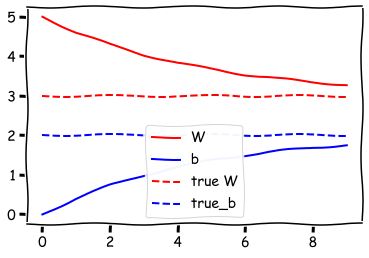

In [42]:
model = Model()

# 도식화를 위해 W값과 b값의 변화를 저장합니다.
Ws, bs = [], []
epochs = range(10)
for epoch in epochs: # 이렇게 그냥 써도 상관 없다.
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(inputs), outputs)
    
    train(model, inputs, outputs, learning_rate=0.1) # 에폭에 조건 걸어서 러닝레이트를 조절할 수 있다.
    print('에포크 %2d: W=%1.2f b=%1.2f, 손실=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))

# 저장된 값들을 도식화합니다.
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()

이렇게 gradient tape를 쓰면 fit보다 훨씬 우아하게 코딩을 할 수 있다.

https://modelzoo.co/framework/tensorflow : 모델 코드 좋은거 많다. 그런데 거의다 1.0 버전이다.

그럼 1.0의 코드를 2.0으로 바꿀 수 없을까? -> 텐서플로에 다 있다. guide 들어가면 시간될 때 공부할 수 있다.

텐서플로2.0 최적화가 안되어 있다. 1.0에 비해서... 그럼 이결 해결하는 방법은? 데코레이터 쓰면 된다. ★★★

https://www.tensorflow.org/tutorials/customization/performance

# Better performance with tf.function

 - 넘파이보다는 tensor를 써야 최적의 성능이 나온다.
 - 넘파이로 만들었다면, 오히려 데코레이터 붙였다가 손해만 본다.

In [37]:
@tf.function # 성능향상이 있다.
def add(a, b):
    return a + b

add(tf.ones([2, 2]), tf.ones([2, 2]))  #  [[2., 2.], [2., 2.]]

<tf.Tensor: id=374, shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

왜 텐서로 바꾸는지 이제 알거다. 속도 더 빠른 이유가 이 데코레이터를 써서 그렇다. gpu 써서 빠른것도 있지만, 이것도 엄청 크다. 여기서는 그냥 이정도만 살펴보고 넘어가보자.

그냥 fit 시키는건 왜 하나? 어떤 장점이 있는가... 

https://www.tensorflow.org/tutorials/keras/regression

fit 시킬 때, 뭘 할 수 있냐면 콜백을 할 수 있다. 콜백은 콜을 하고 그 결과로 실행되는 함수를 말한다. 



In [38]:
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

AttributeError: 'Model' object has no attribute 'fit'

위의 함수에서 콜백이 있는데, 이건 1에폭 돌때마다 나오는 함수를 말한다. 어떤 함수를 실행된 결과로 나오는 것이다. 선생님은 이거 설정 잘해놔서 1에폭 돌때마다, 텔레그램으로 메시지 오게 설정해뒀다고 함 ㅋㅋㅋ

# 텐서플로 2.0 시작하기: 초보자용 콜백실습

fit 함수에 가서 콜백을 추가할 수 있다.

In [46]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [47]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

콜백은 어떤 애를 상속받아서 넣어야 한다. 아래처럼..

In [48]:
from tensorflow.keras.callbacks import Callback, TensorBoard

class MyCallback(Callback):
    pass

my = MyCallback()

In [ ]:
model.fit(x_train, y_train, epochs=5, callbacks = [my, es]) # 이런식으로 쓴다.

model.evaluate(x_test,  y_test, verbose=2)

In [81]:
dir(Callback)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_keras_api_names',
 '_keras_api_names_v1',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'set_model',
 'set_params']

In [48]:
Callback.on_train_begin()

TypeError: on_train_begin() missing 1 required positional argument: 'self'

In [98]:
class MyCallback(Callback):
    def on_train_begin(self, logs): # 오버라이딩 기법: 학습 시작전에 실행
        print('시작')
        pass
    
    def on_train_end(self, logs): # 오버라이딩 기법: 학습이 끝난 후 실행
        print('끝')
        
    def on_epoch_begin(self, epochs, logs): # 1에폭 돌기 전에 실행
        if epoch == 1:
            print('에폭 시작', logs)
        else:
            print('에폭', epochs, '시작')
        
    def on_epoch_end(self, epochs, logs): # 1에폭 돌고나서 실행
        print('에폭 끝', logs)
        
    
        
my = MyCallback()
model.fit(x_train, y_train, epochs=3, callbacks = [my]) # s가 있으니, 다양한 것들을 많이 넣을 수 있음.

Train on 60000 samples
시작
에폭 0 시작
Epoch 1/3
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0230 - accuracy: 0.9921
에폭 1 시작
Epoch 2/3
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0195 - accuracy: 0.9929
에폭 2 시작
Epoch 3/3
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0214 - accuracy: 0.9923
끝


In [99]:
from tensorflow.keras.callbacks import TensorBoard # 이렇게 쓸 수 있다.

In [100]:
from tensorflow.keras.callbacks import EarlyStopping

In [106]:
dir(EarlyStopping)
issubclass(EarlyStopping, Callback) # 얘도 callbacks의 상속이다.

es = EarlyStopping()

In [107]:
import inspect

print(inspect.getsource(EarlyStopping.on_epoch_end))

  def on_epoch_end(self, epoch, logs=None):
    current = self.get_monitor_value(logs)
    if current is None:
      return
    if self.monitor_op(current - self.min_delta, self.best):
      self.best = current
      self.wait = 0
      if self.restore_best_weights:
        self.best_weights = self.model.get_weights()
    else:
      self.wait += 1
      if self.wait >= self.patience:
        self.stopped_epoch = epoch
        self.model.stop_training = True
        if self.restore_best_weights:
          if self.verbose > 0:
            print('Restoring model weights from the end of the best epoch.')
          self.model.set_weights(self.best_weights)



In [105]:
class MyCallback(Callback):
    def on_train_begin(self, logs): # 오버라이딩 기법: 학습 시작전에 실행
        print('시작')
        pass
    
    def on_train_end(self, logs): # 오버라이딩 기법: 학습이 끝난 후 실행
        print('끝')
        
    def on_epoch_begin(self, epochs, logs): # 1에폭 돌기 전에 실행
        if epoch == 1:
            print('에폭 시작', logs)
        else:
            print('에폭', epochs, '시작')
        
    def on_epoch_end(self, epochs, logs): # 1에폭 돌고나서 실행
        print('에폭 끝', logs)
        
    
        
my = MyCallback()
model.fit(x_train, y_train, epochs=3, callbacks = [es]) # s가 있으니, 다양한 것들을 많이 넣을 수 있음.

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0196 - accuracy: 0.9933
Epoch 2/3
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0206 - accuracy: 0.9926
Epoch 3/3
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0192 - accuracy: 0.9931


이 콜백으로 뭘 할 수 있냐면, 모델을 저장할 수 있다.

https://www.tensorflow.org/tutorials/keras/save_and_load : 체크포인트 콜백 참조

In [110]:
from tensorflow.keras.callbacks import CSVLogger

cl = CSVLogger('csv_logger_log.csv')

model.fit(x_train, y_train, epochs=3, callbacks = [cl])
# 파일을 csv로 저장해둘 수 있다. 메일로 보내주는 기능도 추가할 수 있다.

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0197 - accuracy: 0.9933
Epoch 2/3
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0194 - accuracy: 0.9935
Epoch 3/3
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0202 - accuracy: 0.9933
